In [144]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

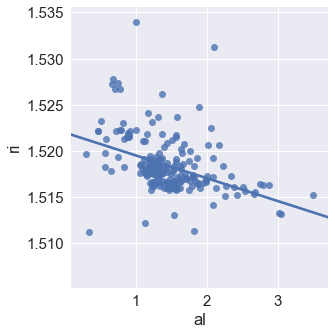

In [146]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

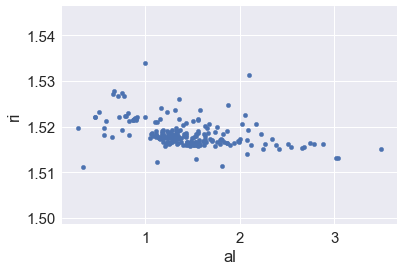

In [147]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

Text(0,0.5,'ri')

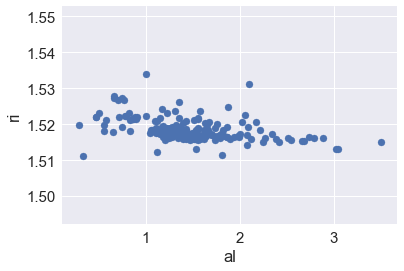

In [148]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [179]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [176]:
# make predictions for all values of X=glass[feature_cols]=["al"]
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


Text(0,0.5,'Predicted ri')

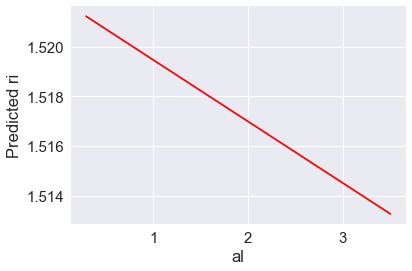

In [152]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

Text(0,0.5,'predicted ri')

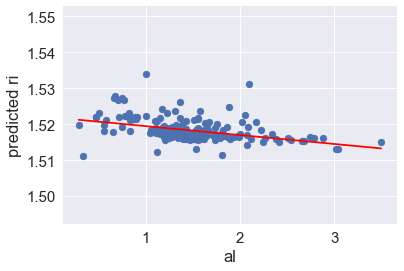

In [182]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('predicted ri')

In [154]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [177]:
print(linreg.intercept_)
print(linreg.coef_) #done on my own

1.5219453302386425
[-0.00247761]


In [155]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([1.51699012])

In [156]:
# examine coefficient for al
list(zip(feature_cols, linreg.coef_))

[('al', -0.0024776063874696235)]

In [157]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243 #that is when al is 3 the predicted coefficients will decrease by 0.0025

1.5145125136125304

In [158]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

array([1.51451251])

In [159]:
# examine glass_type# examin 
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [187]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


Text(0,0.5,'household')

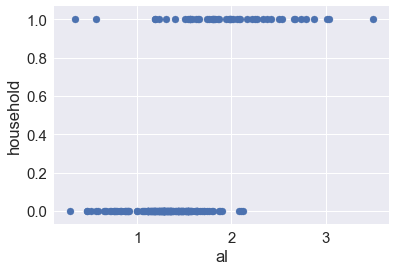

In [188]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [162]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0,0.5,'household_pred')

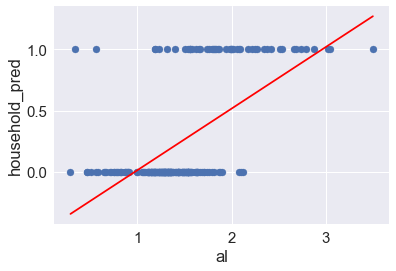

In [189]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')#GRAPH BETWEEN "al" AND "household_pred"
plt.xlabel('al')
plt.ylabel('household_pred')

In [164]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [165]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head() #it will assign 1 if the values in glass.household_pred value is greater than 0.5

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


In [167]:
print(glass)

          ri     na    mg    al     si     k     ca    ba    fe  glass_type  \
id                                                                            
22   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.00  0.00           1   
185  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00           6   
40   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00           1   
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00           1   
51   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16           1   
184  1.51969  14.56  0.00  0.56  73.48  0.00  11.22  0.00  0.00           6   
110  1.51818  13.72  0.00  0.56  74.45  0.00  10.99  0.00  0.00           2   
158  1.52121  14.03  3.76  0.58  71.79  0.11   9.65  0.00  0.00           3   
153  1.51779  13.64  3.65  0.65  73.00  0.06   8.93  0.00  0.00           3   
104  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00           2   
113  1.52777  12.64  0.00  0.67  72.02  0.06  14.40 

Text(0,0.5,'household_pred-class')

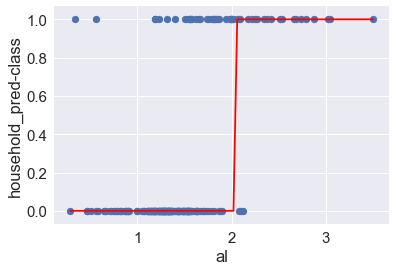

In [190]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household_pred-class')

In [ ]:
#LOGISTIC REGRESSION

In [275]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

In [219]:
print(logreg.intercept_)
print(logreg.coef_)

[-4.12790736]
[[2.01099096]]


Text(0,0.5,'household')

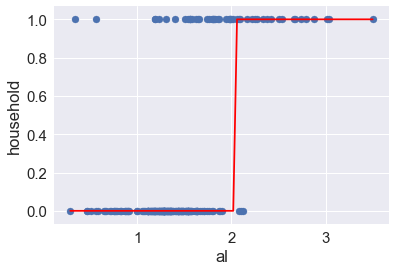

In [169]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')#GRAPH BETWEEN "al" AND "household_pred_class"
plt.xlabel('al')
plt.ylabel('household')

In [228]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]#it predicts the value probably so use keyword proba

Text(0,0.5,'household_pred_prob')

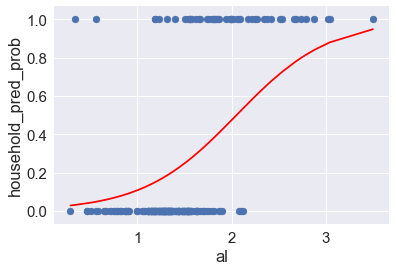

In [197]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household_pred_prob')

In [198]:
# examine some example predictions
print (logreg.predict_proba(1))
print (logreg.predict_proba(2))
print (logreg.predict_proba(3))

[[0.89253652 0.10746348]]
[[0.52645662 0.47354338]]
[[0.12953623 0.87046377]]


In [201]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table
                       #where formula for odds is (p)/(1-p)

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [202]:
# exponential function: e^1
np.exp(1) #it is just an exponential function in calcultor

2.718281828459045

In [203]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)#it is nothing but taking natural log(ln)  for the exponential value found using the calculator

0.999896315728952

In [204]:
np.log(np.exp(5))

5.0

In [205]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


Text(0,0.5,'household')

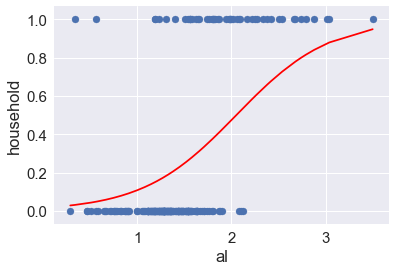

In [206]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [215]:
print(logreg.intercept_)
print(logreg.coef_)

[-4.12790736]
[[2.01099096]]


In [241]:
print(logreg.intercept_)
print(logreg.coef_[0])

[-4.12790736]
[2.01099096]


In [242]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([-0.10592543])

In [248]:
# convert log-odds to odds# conver 
odds = np.exp(logodds)
odds

array([0.89949172])

In [244]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.47354338])

In [255]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([0.47354338])

In [256]:
# examine the coefficient for al
list(zip(feature_cols, logreg.coef_[0]))

[('al', 2.0109909641729433)]

In [253]:
print(logreg.intercept_)
print(logreg.coef_)


[-4.12790736]
[[2.01099096]]


In [264]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = -0.10592543+2.0109909641729433
odds = np.exp(logodds)
odds

6.719847992885822

In [265]:
prob = odds/(1 + odds)
prob

0.8704637706698961

In [252]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([0.87046377])

In [ ]:
#FOR REFERENCE FROM FRONT

In [266]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [235]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([1.51699012])

In [236]:
# examine coefficient for al
list(zip(feature_cols, linreg.coef_))


[('al', -0.0024776063874696235)]

In [237]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [238]:
# compute prediction for al=3 using the predict method
linreg.predict(3)


array([1.51451251])

In [239]:
#UPTO THIS REFERENCE

In [267]:
# examine the intercept
logreg.intercept_

array([-4.12790736])

In [268]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.01586095])

In [270]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)
glass["high_ba"].head()

id
22     0
185    0
40     0
39     0
51     0
Name: high_ba, dtype: int32

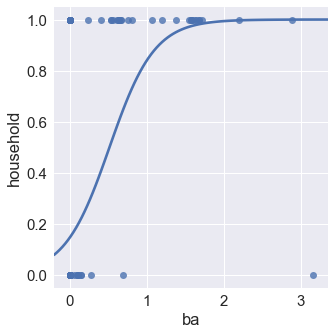

In [271]:
# original (continuous) feature
sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

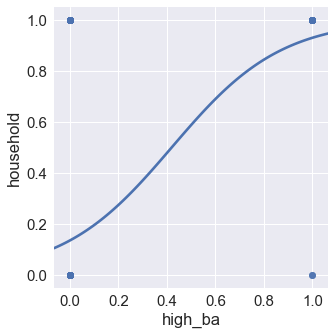

In [272]:
# categorical feature
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True)

In [ ]:
# fit a logistic regression model
feature_cols = ['high_ba']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

In [273]:
# examine the coefficient for high_ba
list(zip(feature_cols, logreg.coef_[0]))

[('al', 2.0109909641729433)]

In [1]:
#ANOTHER EXAMPLE

In [2]:
#import libraries and files
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import preprocessing

In [5]:
# load tic-tac-toe data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data", sep=",")
data.rename(columns={'x': 'top left', 'x.1': 'top middle', 'x.2': 'top right','x.3': 'middle left', 'o': 'middle middle',
                     'o.1' : 'middle right', 'x.4' : 'bottom left', 'o.2' : 'bottom middle', 'o.3':'bottom right',
                     'positive' : 'outcome'},inplace=True)

In [6]:
data.head()

,top left,top middle,top right,middle left,middle middle,middle right,bottom left,bottom middle,bottom right,outcome
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [8]:
data.shape

(957, 10)

In [9]:
#data preprocessing
data_new = pd.get_dummies(data.iloc[:,0:9])

In [10]:
data_new.head()

,top left_b,top left_o,top left_x,top middle_b,top middle_o,top middle_x,top right_b,top right_o,top right_x,middle left_b,...,middle right_x,bottom left_b,bottom left_o,bottom left_x,bottom middle_b,bottom middle_o,bottom middle_x,bottom right_b,bottom right_o,bottom right_x
0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [12]:
data_final = pd.concat([data_new, data.iloc[:,9]],axis=1)#concatenating data_new and 9th column of each row
data_final.head()

,top left_b,top left_o,top left_x,top middle_b,top middle_o,top middle_x,top right_b,top right_o,top right_x,middle left_b,...,bottom left_b,bottom left_o,bottom left_x,bottom middle_b,bottom middle_o,bottom middle_x,bottom right_b,bottom right_o,bottom right_x,outcome
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,positive
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,positive
2,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,positive
3,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,positive
4,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,positive


In [13]:
# Split data into training and test sets
train, test = train_test_split(data_final, test_size=0.3)

In [15]:
#Applying logistic Regression model#Applyin 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [16]:
x_train = train.iloc[:, :-1]
y_train= train.iloc[:, -1]
x_test = test.iloc[:, :-1]
y_test= test.iloc[:, -1]
LR = LR.fit(x_train, y_train)

In [17]:
LR.score(x_train, y_train)

0.9835575485799701

In [22]:
#Evaluate model on test data
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
prob = LR.predict_proba(x_test)
print(prob)
predicted= LR.predict(x_test)
print(predicted)

[[0.80483572 0.19516428]
 [0.87153046 0.12846954]
 [0.82331751 0.17668249]
 [0.89701816 0.10298184]
 [0.08199214 0.91800786]
 [0.63536801 0.36463199]
 [0.08606538 0.91393462]
 [0.56586803 0.43413197]
 [0.15348676 0.84651324]
 [0.17208723 0.82791277]
 [0.18077054 0.81922946]
 [0.05158914 0.94841086]
 [0.05802594 0.94197406]
 [0.71789158 0.28210842]
 [0.18760627 0.81239373]
 [0.12314473 0.87685527]
 [0.52295692 0.47704308]
 [0.91957512 0.08042488]
 [0.59884558 0.40115442]
 [0.80013588 0.19986412]
 [0.47239519 0.52760481]
 [0.61989782 0.38010218]
 [0.06647285 0.93352715]
 [0.24092579 0.75907421]
 [0.18461037 0.81538963]
 [0.64944063 0.35055937]
 [0.11992866 0.88007134]
 [0.13950502 0.86049498]
 [0.16961471 0.83038529]
 [0.16968707 0.83031293]
 [0.1174939  0.8825061 ]
 [0.80116018 0.19883982]
 [0.21357408 0.78642592]
 [0.0818115  0.9181885 ]
 [0.12021071 0.87978929]
 [0.87233209 0.12766791]
 [0.05247022 0.94752978]
 [0.15215088 0.84784912]
 [0.90662856 0.09337144]
 [0.07613043 0.92386957]


In [20]:
#Findind the accuracy using confusion matrix
print(metrics.accuracy_score(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

0.9826388888888888
[[108   5]
 [  0 175]]
             precision    recall  f1-score   support

   negative       1.00      0.96      0.98       113
   positive       0.97      1.00      0.99       175

avg / total       0.98      0.98      0.98       288



In [23]:
#Finding the accuracy using cross validation method
scores = cross_val_score(LogisticRegression(), data_final.iloc[:, 0:27], data_final.iloc[:, 27], scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.97938144 1.         0.98958333 1.         1.         0.96842105
 0.98947368 1.         1.         0.83157895]
0.9758438460842829
